In [98]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [99]:
data = pd.read_csv('student-mat.csv',sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [100]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [101]:
data = data[["G1","G2","G3","studytime","failures","absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [102]:
predict = 'G3'

In [103]:
X = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])


In [104]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.1)

In [105]:
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)
acc = linear.score(X_test,y_test)
print(acc)

0.9168926045593446


In [106]:
print('Co: ' , linear.coef_)
print('Intercept: ' , linear.intercept_)

Co:  [ 0.17281896  0.96783646 -0.16907752 -0.25343636  0.0383097 ]
Intercept:  -1.634853738952506


In [109]:
predictions = linear.predict(X_test)

for x in range (len(predictions)):
    print(predictions[x], X_test[x],y_test[x])


                

13.992425688318486 [13 14  1  0  0] 14
10.055743985912022 [ 8 11  2  0  0] 11
10.63124009539611 [10 11  2  0  6] 11
11.192657969978738 [ 8 12  1  0  0] 12
11.073077572347868 [13 11  2  0  4] 11
6.869974704992027 [ 9  7  2  1 20] 8
10.82363921644895 [12 11  2  0  2] 12
16.426975327392725 [15 16  1  0  4] 15
12.822946737904578 [13 12  1  0 20] 12
18.581259787293227 [18 18  3  0  5] 19
16.44655549023289 [16 16  1  0  0] 15
6.722237837558238 [6 8 1 1 0] 8
12.174572668518397 [12 12  2  0 12] 11
14.681743699735444 [15 14  2  1 20] 13
9.241146317646322 [ 8 10  2  0  4] 10
12.75931214372535 [12 13  2  0  2] 13
9.619394673696915 [ 7 10  2  1 25] 11
10.7470198187627 [12 11  2  0  0] 12
10.542523410438001 [11 11  4  0  8] 10
12.932131101938019 [13 13  2  0  2] 13
13.884128840520205 [13 14  3  0  6] 14
7.046791668748137 [ 9  7  2  0 18] 6
18.808227169405036 [19 18  2  0  2] 18
3.653392363999278 [7 5 3 1 0] 0
3.8835071248173128 [5 5 2 0 4] 6
14.24560548200156 [15 14  2  0  2] 14
11.75690741902818 [

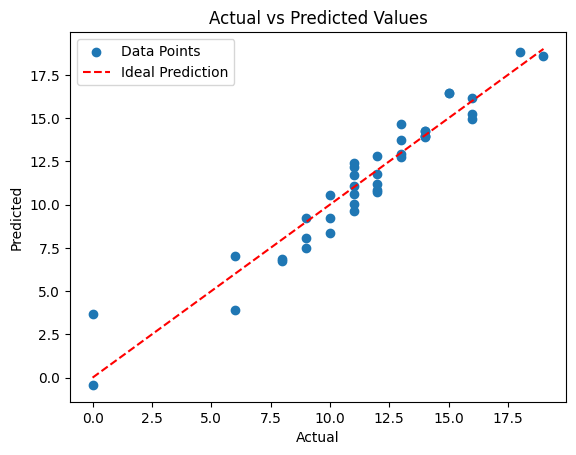

In [113]:
import matplotlib.pyplot as plt

# Make predictions
predictions = linear.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, predictions, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')  # Plotting the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
